X.Shape: (26, 2)


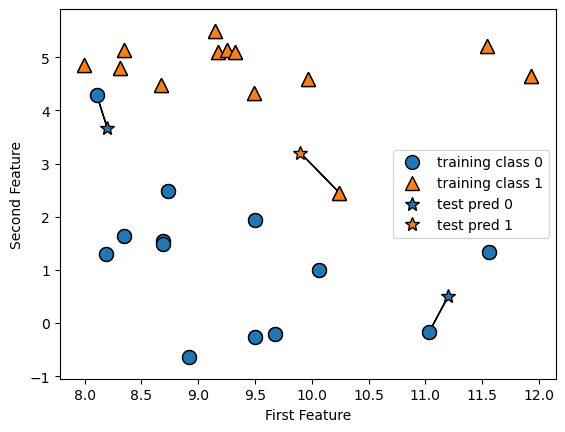

In [5]:
import mglearn
import matplotlib.pyplot as plt

x, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.legend(["Class 0","Class 1"], loc = 4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")

print("X.Shape: {}".format(x.shape))

mglearn.plots.plot_knn_classification(n_neighbors=1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x, y = mglearn.datasets.make_forge()

x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=0)

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(x_train,y_train)

print ("test set predictions: {}".format(clf.predict(x_test)))

print("test set accurayc: {:.2f}".format(clf.score(x_test,y_test)))

test set predictions: [1 0 1 0 1 0 0]
test set accurayc: 0.86


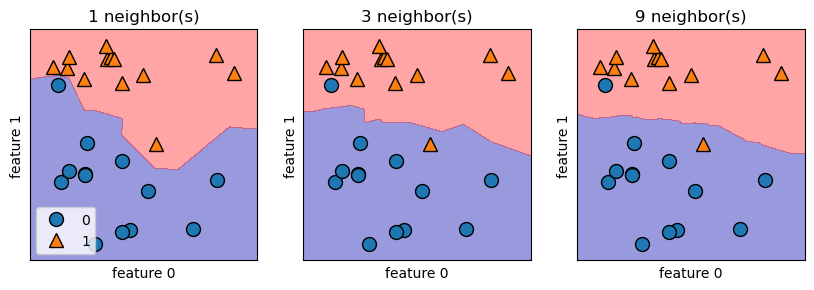

In [7]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import mglearn

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Loop through different numbers of neighbors
for n_neighbors, ax in zip([1, 3, 9], axes): # zip() pair corresponding two or more iterable array/list/tupple with the AX
    # Instantiate and train the k-NN classifier
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    
    # Plot/Draw the decision boundary in a 2d space 
    # fill = is to colour both side of boundaries
    # eps= controls the scale of the decision boundary.
    # Smaller values make the boundary more detailed.
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=.4) 
   
    # Plot scatter discrete markers for each class.
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    
    # Set title and labels
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
    # Add legend to the first subplot
    axes[0].legend(loc=3)

# Display the subplots
plt.show()

Test set accuracy: 0.92


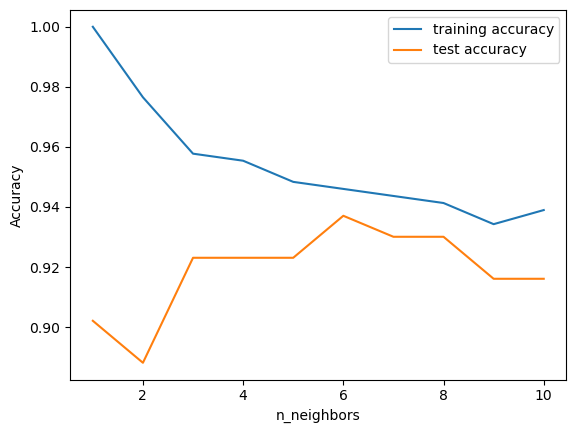

In [9]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Initialize Lists for Accuracy Storage
training_accuracy = []
test_accuracy = []

# Loop Through Different Numbers of Neighbors
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # .append untuk tamukan jadi one element
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Convert accuracy lists to numpy arrays
training_accuracy = np.array(training_accuracy)
test_accuracy = np.array(test_accuracy)

# Plot Accuracy Curves
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
